In [5]:
from src.Prep import *
from src.Time_Series_Helper_Funcs import *
from src.Regression_Helper_Funcs import *
from src.Plot import * 
import warnings
warnings.filterwarnings('ignore')

In [6]:
%load_ext autoreload
%reload_ext autoreload

In [7]:
%autoreload

# DATA
## Load in, clean, sort, and filter data

In [9]:
df = prep()

1 of 11 |    Reading in first dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
2 of 11 |    Reading in second dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
3 of 11 |    Concatenating datasets together
4 of 11 |    Refining to only RES Customer Segment
5 of 11 |    Cleaning up column names
6 of 11 |    Sorting values by installation_date
7 of 11 |    Assigning installation_date as index
8 of 11 |    Replacing all null values with median values from same year
9 of 11 |    Adusting prices for inflation
10 of 11|    Creating target variable: cost_per_watt
11 of 11|    Removing > 1600 outliers above $25 per watt
Prep complete 
 ------------------------------------------------------------


In [10]:
y = time_frame(df)

In [11]:
test_for_stationarity(y)

ADF p-value: 0.97
Time Series is not stationary. Fail to reject ADF H0


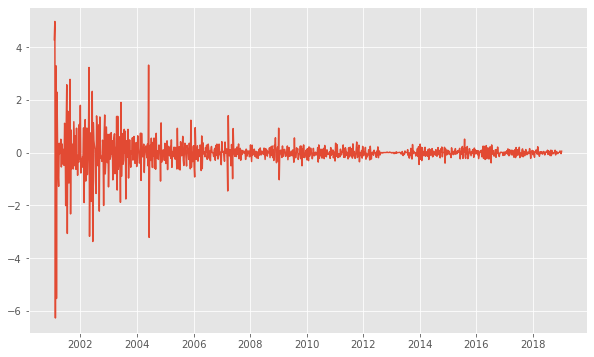

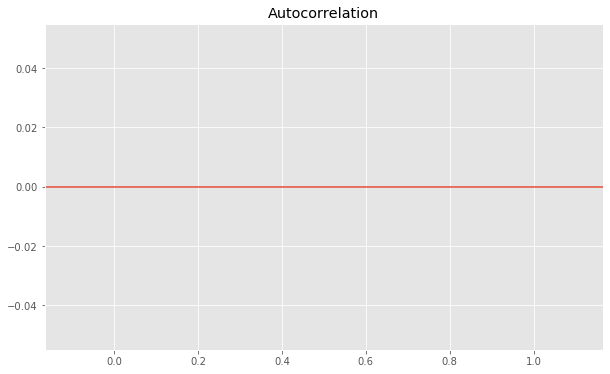

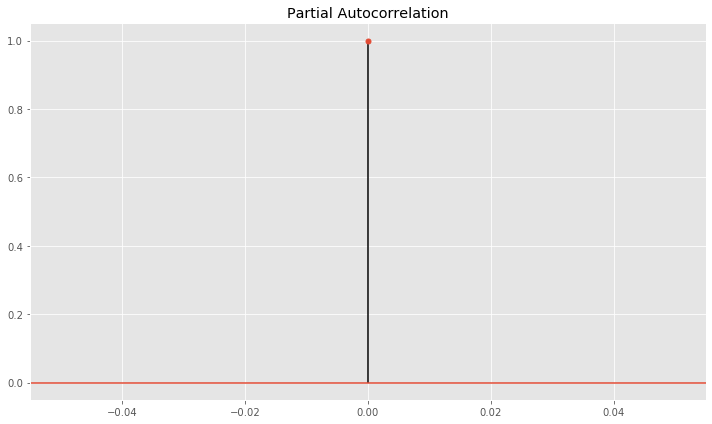

In [22]:
diff = get_differences(y).dropna()

In [23]:
test_for_stationarity(diff)

ADF p-value: 0.00
Achieved stationarity! Reject ADF H0.


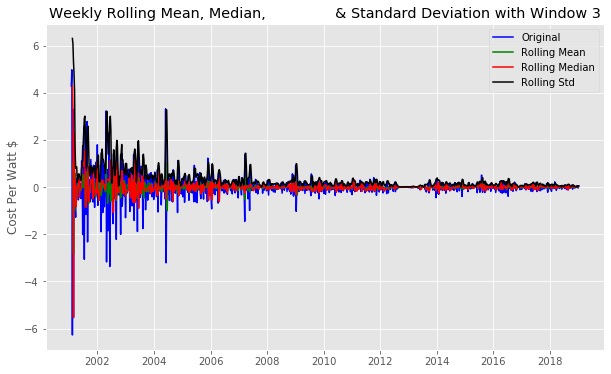

Results of Dickey-Fuller Test:
Test Statistic         -9.132508e+00
p-value                 2.995613e-15
#Lags Used              2.000000e+01
#Observations Used      9.160000e+02
Critical Value (1%)    -3.437509e+00
Critical Value (5%)    -2.864700e+00
Critical Value (10%)   -2.568453e+00
dtype: float64


In [24]:
rolling_plot(diff)
dfuller_test(diff)

# REGRESSION
## Run through basic regression models: 
#### - OLS Regression
#### - Linear Regression
#### - Random Forest Regressor 

In [20]:
rf_trend = random_forest_model(diff)

MSE = 0.019467823529411784


In [ ]:
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]

score_table(y, ols_model, linear_model, rf_model)